In [17]:
from SALib.sample import saltelli
from tqdm.auto import tqdm
import numpy as np
import pickle
import time
import lzma
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [7]:
# problem definition
PROBLEM = {
    "num_vars" : 5,
    "names"    : ["theta",
                  "gain_right",
                  "saving_prop",
                  "prob_left",
                  "alpha"],
    "bounds"   : [[0.01, 0.20],
                  [1.70, 8.00],
                  [0.70, 0.80],
                  [0.30, 0.45],
                  [2.00, 12.0]]
}

# generate Saltelli samples
NUM_SAMPLES = 1024
X_no_debt = saltelli.sample(PROBLEM, NUM_SAMPLES, calc_second_order=False)

/var/folders/bj/4q98hxqx4vq6wwm8qqllvxmr0000gn/T/ipykernel_6525/960484.py:18: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  X_no_debt = saltelli.sample(PROBLEM, NUM_SAMPLES, calc_second_order=False)


In [4]:
with open("notebooks/phase_plots_no_debt.pickle", "rb") as f:
    data = pickle.load(f)
GINIS = data["gini"]
PROP_RICHER = data["prop_richer"]

In [19]:
thetas = []
prop_richer = []

for rep in PROP_RICHER:
    for i,item in enumerate(rep):
        thetas.append(X_no_debt[i][0])
        
        if item > 0 and item < 1:
            item = 1
        elif item == 1:
            item = 2
        
        prop_richer.append(item)

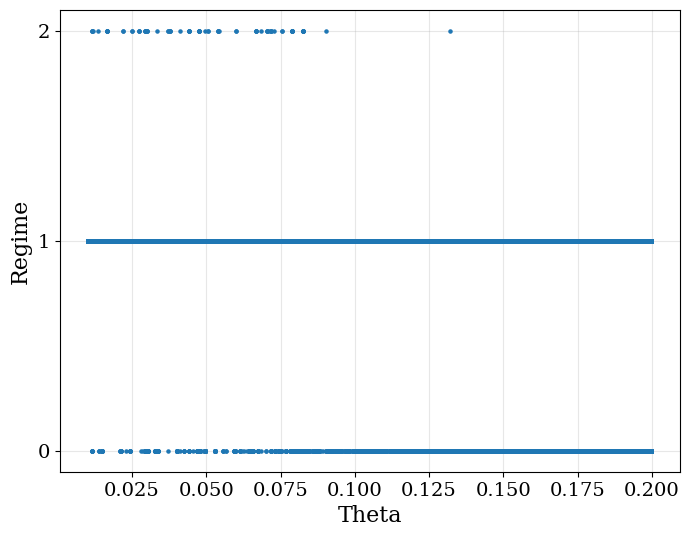

In [27]:
plt.scatter(thetas, prop_richer, s=5)
plt.xlabel("Theta")
plt.ylabel("Regime")
plt.yticks([0,1,2])
plt.show()

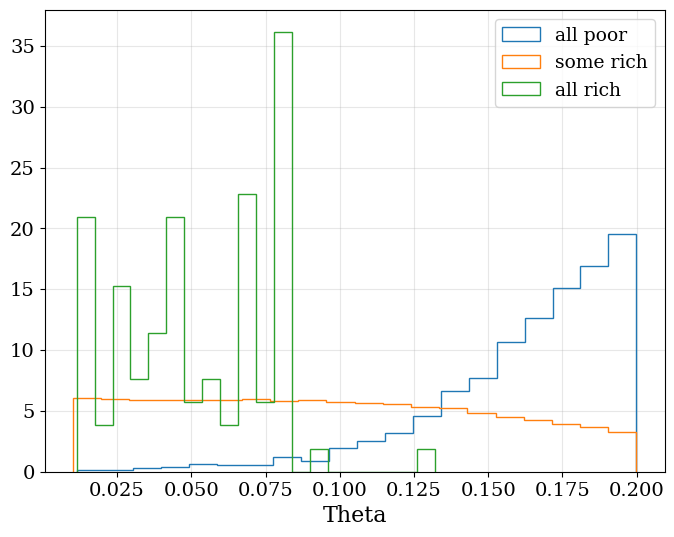

In [103]:
labels = {0:"all poor", 1:"some rich", 2:"all rich"}
for regime in range(3):
    vals = []
    for i in range(len(prop_richer)):
        if prop_richer[i] == regime:
            vals.append(thetas[i])
    plt.hist(vals, bins=20, histtype="step", label=labels[regime], density=True)
    
plt.xlabel("Theta")
plt.legend()
plt.show()